# 数据探索

## 数据基本信息

### 工具导入

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm as tqdm

plt.rcParams['font.sans-serif'] = ['SimHei']   #解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False    # 解决中文显示问题

### 数据读取

In [2]:
#data=pd.read_csv('lizhiyucerun2022-07-28.csv')
data=pd.read_csv('ct_lzyc.csv')

### 数据样例

In [3]:
data.head(5)

,Unnamed: 0,工号,员工类型,离职类型,申请时间,确认时间,数据日期,消息发送,消息接收,在线文档被查阅总数,...,司龄(月),最近一次绩效,最新离职申请提交时间,最新离职生效时间,最新全转专日期,最新异动日期,最近一次入职时间,当周考勤打卡次数,当周应出勤天数,当周外勤打卡次数
0,0,ad621a23bd5c2474c1fe0909a8a38bb5fcccd382e855f9...,全职员工,被动离职,NaN,2021-12-31,2021-01-03,114.0,166.20,0.0,...,24,S,NaN,2021-12-31,NaN,2021-09-01,2019-01-28,0.0,1.0,0.0
1,1,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,全职教师,主动离职,2021-09-01,2021-10-01,2021-04-25,214.0,227.10,2.0,...,204,B,2021-09-01,2021-10-01,NaN,2020-10-01,2004-05-01,0.0,2.0,0.0
2,2,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,全职教师,主动离职,2021-09-01,2021-10-01,2021-06-27,71.0,107.50,0.0,...,206,B,2021-09-01,2021-10-01,NaN,2020-10-01,2004-05-01,6.0,5.0,0.0
3,3,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,全职教师,主动离职,2021-09-01,2021-10-01,2021-08-29,56.0,78.00,0.0,...,207.90,B,2021-09-01,2021-10-01,,2020-10-01,2004-05-01,0.0,5.0,0.0
4,4,29a4ee71e3c86f7f4c1e73313529a5a01b378e9a088948...,全职员工,NaN,NaN,NaN,2022-02-20,37.0,62.16,5.0,...,211.61,S,NaN,NaN,NaN,2022-01-01,2004-07-01,0.0,0.0,0.0


### 数据基本信息

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547632 entries, 0 to 4547631
Data columns (total 62 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   工号          object 
 2   员工类型        object 
 3   离职类型        object 
 4   申请时间        object 
 5   确认时间        object 
 6   数据日期        object 
 7   消息发送        float64
 8   消息接收        float64
 9   在线文档被查阅总数   float64
 10  在线文档被编辑总数   float64
 11  在线文档被评论总数   float64
 12  在线文档被收藏总数   float64
 13  周报被阅读总数     float64
 14  周报被点赞总数     float64
 15  周报被评论总数     float64
 16  在线文档查阅总数    float64
 17  在线文档编辑总数    float64
 18  在线文档评论总数    float64
 19  在线文档收藏总数    float64
 20  周报阅读总数      float64
 21  周报点赞总数      float64
 22  周报评论总数      float64
 23  知音楼日均在线     float64
 24  请假总天数       float64
 25  周报字数        float64
 26  音视频会议参与总时长  float64
 27  音视频会议参与总数   float64
 28  日程参与总数      float64
 29  日程参与总时长     float64
 30  线文档主被动评论人数  float64
 31  线文档主被动编辑人数  float64
 32  线文档主被动阅读人数  float64
 33  文档评论中心度

## 数据压缩

### 数据存储最小格式

In [6]:
def check_smallest_dtype(df,cat_col=[]):
    numerics=['int16','int32','int64','float16','float32','float64']
    smallest_dtype={}
    for col in df.columns:
        col_type=df[col].dtypes
        if col_type in numerics:
            c_min=df[col].min()
            c_max=df[col].max()
            if str(col_type)[:3]=='int':
                if c_min>np.iinfo(np.int8).min and c_max<np.iinfo(np.int8).max:
                    smdp='int8'
                elif c_min>np.iinfo(np.int16).min and c_max<np.iinfo(np.int16).max:
                    smdp='int16'
                elif c_min>np.iinfo(np.int32).min and c_max<np.iinfo(np.int32).max:
                    smdp='int32'
                elif c_min>np.iinfo(np.int64).min and c_max<np.iinfo(np.int64).max:
                    smdp='int64'
            if str(col_type)[:5]=='float':
                if c_min>np.finfo(np.float16).min and c_max<np.finfo(np.float16).max:
                    smdp='float16'
                elif c_min>np.finfo(np.float32).min and c_max<np.finfo(np.float32).max:
                    smdp='float32'
                else:
                    smdp='float64'
        else:
            if col in cat_col:
                smdp='category'
            else:
                smdp=col_type
        smallest_dtype[col]=smdp
    return smallest_dtype


In [7]:
ct_data=check_smallest_dtype(data)
ct_data

{'Unnamed: 0': 'int32',
 '工号': dtype('O'),
 '员工类型': dtype('O'),
 '离职类型': dtype('O'),
 '申请时间': dtype('O'),
 '确认时间': dtype('O'),
 '数据日期': dtype('O'),
 '消息发送': 'float16',
 '消息接收': 'float16',
 '在线文档被查阅总数': 'float16',
 '在线文档被编辑总数': 'float16',
 '在线文档被评论总数': 'float16',
 '在线文档被收藏总数': 'float16',
 '周报被阅读总数': 'float16',
 '周报被点赞总数': 'float16',
 '周报被评论总数': 'float16',
 '在线文档查阅总数': 'float16',
 '在线文档编辑总数': 'float16',
 '在线文档评论总数': 'float16',
 '在线文档收藏总数': 'float16',
 '周报阅读总数': 'float16',
 '周报点赞总数': 'float16',
 '周报评论总数': 'float16',
 '知音楼日均在线': 'float16',
 '请假总天数': 'float16',
 '周报字数': 'float16',
 '音视频会议参与总时长': 'float16',
 '音视频会议参与总数': 'float16',
 '日程参与总数': 'float16',
 '日程参与总时长': 'float16',
 '线文档主被动评论人数': 'float16',
 '线文档主被动编辑人数': 'float16',
 '线文档主被动阅读人数': 'float16',
 '文档评论中心度': 'float16',
 '消息中心度': 'float16',
 '文档编辑中心度': 'float16',
 '文档阅读中心度': 'float16',
 '消息沟通人数': 'float16',
 '创建文档数': 'float16',
 '文档沟通人数': 'float16',
 '日程沟通人数': 'float16',
 '会议沟通人数': 'float16',
 '周报沟通人数': 'float16',
 '语音电话时长m': 'float16',

### 数据重新读取

In [8]:
#data=pd.read_csv('lizhiyucerun2022-07-28.csv',dtype=ct_data)

In [9]:
#data.info()

In [10]:
#data.to_csv('ct_lzyc.csv')

## 数据提取

### 数据选取

由于‘最近一次绩效’缺失率较高，选取非空数据

In [11]:
data=data[data['最近一次绩效'].notnull()]
data

,Unnamed: 0,工号,员工类型,离职类型,申请时间,确认时间,数据日期,消息发送,消息接收,在线文档被查阅总数,...,司龄(月),最近一次绩效,最新离职申请提交时间,最新离职生效时间,最新全转专日期,最新异动日期,最近一次入职时间,当周考勤打卡次数,当周应出勤天数,当周外勤打卡次数
0,0,ad621a23bd5c2474c1fe0909a8a38bb5fcccd382e855f9...,全职员工,被动离职,NaN,2021-12-31,2021-01-03,114.0,166.20,0.0,...,24,S,NaN,2021-12-31,NaN,2021-09-01,2019-01-28,0.0,1.0,0.0
1,1,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,全职教师,主动离职,2021-09-01,2021-10-01,2021-04-25,214.0,227.10,2.0,...,204,B,2021-09-01,2021-10-01,NaN,2020-10-01,2004-05-01,0.0,2.0,0.0
2,2,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,全职教师,主动离职,2021-09-01,2021-10-01,2021-06-27,71.0,107.50,0.0,...,206,B,2021-09-01,2021-10-01,NaN,2020-10-01,2004-05-01,6.0,5.0,0.0
3,3,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,全职教师,主动离职,2021-09-01,2021-10-01,2021-08-29,56.0,78.00,0.0,...,207.90,B,2021-09-01,2021-10-01,,2020-10-01,2004-05-01,0.0,5.0,0.0
4,4,29a4ee71e3c86f7f4c1e73313529a5a01b378e9a088948...,全职员工,NaN,NaN,NaN,2022-02-20,37.0,62.16,5.0,...,211.61,S,NaN,NaN,NaN,2022-01-01,2004-07-01,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4547063,4547063,310c5a92cffb80a7fc91981b64c9cc94d3b609004be2d5...,全职教师,NaN,NaN,NaN,2022-03-06,1054.0,967.00,0.0,...,6.48,C,NaN,NaN,NaN,2022-07-01,2021-08-22,7.0,5.0,5.0
4547064,4547064,310c5a92cffb80a7fc91981b64c9cc94d3b609004be2d5...,全职教师,NaN,NaN,NaN,2022-05-08,362.0,387.20,0.0,...,8.55,C,NaN,NaN,NaN,2022-07-01,2021-08-22,6.0,3.0,0.0
4547189,4547189,40e7c552de3965628f09d7c0044044adb7553cb93353c6...,全职员工,NaN,NaN,NaN,2022-04-03,249.0,197.60,0.0,...,5.26,B,NaN,NaN,NaN,2022-07-01,2021-10-26,2.0,6.0,0.0
4547190,4547190,40e7c552de3965628f09d7c0044044adb7553cb93353c6...,全职员工,NaN,NaN,NaN,2022-06-05,83.0,73.44,3.0,...,7.32,B,NaN,NaN,NaN,2022-07-01,2021-10-26,0.0,4.0,0.0


### 数据查看

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244033 entries, 0 to 4547247
Data columns (total 62 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1244033 non-null  int64  
 1   工号          1244033 non-null  object 
 2   员工类型        1244033 non-null  object 
 3   离职类型        858500 non-null   object 
 4   申请时间        564177 non-null   object 
 5   确认时间        864259 non-null   object 
 6   数据日期        1244033 non-null  object 
 7   消息发送        1231230 non-null  float64
 8   消息接收        1231230 non-null  float64
 9   在线文档被查阅总数   1231230 non-null  float64
 10  在线文档被编辑总数   1231230 non-null  float64
 11  在线文档被评论总数   1231230 non-null  float64
 12  在线文档被收藏总数   1231230 non-null  float64
 13  周报被阅读总数     1231230 non-null  float64
 14  周报被点赞总数     1231230 non-null  float64
 15  周报被评论总数     1231230 non-null  float64
 16  在线文档查阅总数    1230546 non-null  float64
 17  在线文档编辑总数    1230546 non-null  float64
 18  在线文档评论总数    1230546 no

In [13]:
data.shape

(1244033, 62)

In [14]:
data['工号'].unique().shape

(25775,)

## 缺失值处理

### 查看数据缺失情况

In [15]:
# qsl=data.apply(lambda x:x.isnull().sum()/len(x))
# pd.DataFrame(qsl,columns=['缺失率'])
# q
def check_na(data):
        null_val_sums = data.isnull().sum() +data.isin(['空']).sum()#统计每个列有多少缺失值

        per_null = list(null_val_sums.values / len(data))  #计算缺失率
        total = 0
        for ele in range(0, len(per_null)):
            total = total + per_null[ele]
        
        if total == 0:
            print('所有变量无缺失值')
        else:
            for i in range(len(per_null)):
                if per_null[i]!=0:
                    print(list(data)[i],per_null[i])
                    
        return 
check_na(data)

离职类型 0.30990576616536697
申请时间 0.5464935415700387
确认时间 0.30527646774643435
消息发送 0.01029152763632476
消息接收 0.01029152763632476
在线文档被查阅总数 0.01029152763632476
在线文档被编辑总数 0.01029152763632476
在线文档被评论总数 0.01029152763632476
在线文档被收藏总数 0.01029152763632476
周报被阅读总数 0.01029152763632476
周报被点赞总数 0.01029152763632476
周报被评论总数 0.01029152763632476
在线文档查阅总数 0.010841352279240182
在线文档编辑总数 0.010841352279240182
在线文档评论总数 0.010841352279240182
在线文档收藏总数 0.010841352279240182
周报阅读总数 0.010841352279240182
周报点赞总数 0.010841352279240182
周报评论总数 0.010841352279240182
知音楼日均在线 0.010853409837198853
请假总天数 0.010299566008297208
周报字数 0.5097935504926316
音视频会议参与总数 0.5159203976100313
日程参与总数 0.2652477868352367
日程参与总时长 0.2652477868352367
线文档主被动评论人数 0.01029152763632476
线文档主被动编辑人数 0.01029152763632476
线文档主被动阅读人数 0.01029152763632476
消息沟通人数 0.01029152763632476
创建文档数 0.743325940710576
文档沟通人数 0.01029152763632476
日程沟通人数 0.01029152763632476
会议沟通人数 0.01029152763632476
周报沟通人数 0.01029152763632476
语音电话时长m 0.5226396727418002
语音电话沟通人数 0.5226396727418002

缺失率较高特征：申请时间、音视频会议参与总数、创建文档数、语音电话时长m、语音电话沟通人数、最新离职申请提交时间、最新全转专日期

### 删除缺失较高的列

In [16]:
data=data.drop(labels=['Unnamed: 0','音视频会议参与总数','创建文档数','语音电话时长m','语音电话沟通人数','最新离职申请提交时间','最新全转专日期'],axis=1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244033 entries, 0 to 4547247
Data columns (total 55 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   工号          1244033 non-null  object 
 1   员工类型        1244033 non-null  object 
 2   离职类型        858500 non-null   object 
 3   申请时间        564177 non-null   object 
 4   确认时间        864259 non-null   object 
 5   数据日期        1244033 non-null  object 
 6   消息发送        1231230 non-null  float64
 7   消息接收        1231230 non-null  float64
 8   在线文档被查阅总数   1231230 non-null  float64
 9   在线文档被编辑总数   1231230 non-null  float64
 10  在线文档被评论总数   1231230 non-null  float64
 11  在线文档被收藏总数   1231230 non-null  float64
 12  周报被阅读总数     1231230 non-null  float64
 13  周报被点赞总数     1231230 non-null  float64
 14  周报被评论总数     1231230 non-null  float64
 15  在线文档查阅总数    1230546 non-null  float64
 16  在线文档编辑总数    1230546 non-null  float64
 17  在线文档评论总数    1230546 non-null  float64
 18  在线文档收藏总数    1230546 no

### 编码

In [18]:
#定义人员类型
def people_type(x):
    if pd.isna(x['离职类型']) and pd.isna(x['申请时间']) and pd.isna(x['确认时间']):#判断是否为空值
        return '000'
    elif pd.isna(x['离职类型']) and pd.isna(x['申请时间']) and pd.notna(x['确认时间']):
        return '001'
    elif pd.isna(x['离职类型']) and pd.notna(x['申请时间']) and pd.isna(x['确认时间']):
        return '010'
    elif pd.isna(x['离职类型']) and pd.notna(x['申请时间']) and pd.notna(x['确认时间']):
        return '011'
    elif x['离职类型'] == '主动离职' and pd.isna(x['申请时间']) and pd.isna(x['确认时间']):
        return '100'
    elif x['离职类型'] == '主动离职' and pd.notna(x['申请时间']) and pd.isna(x['确认时间']):
        return '110'
    elif x['离职类型'] == '主动离职' and pd.isna(x['申请时间']) and pd.notna(x['确认时间']):
        return '101'
    elif x['离职类型'] == '主动离职' and pd.notna(x['申请时间']) and pd.notna(x['确认时间']):
        if x['申请时间'] > x['确认时间']:
            return '121'
        else:
            return '112'
    elif x['离职类型'] == '被动离职' and pd.isna(x['申请时间']) and pd.isna(x['确认时间']):
        return '200'
    elif x['离职类型'] == '被动离职' and pd.notna(x['申请时间']) and pd.isna(x['确认时间']):
        return '210'
    elif x['离职类型'] == '被动离职' and pd.isna(x['申请时间']) and pd.notna(x['确认时间']):
        return '201'
    elif x['离职类型'] == '被动离职' and pd.notna(x['申请时间']) and pd.notna(x['确认时间']):
        return '211'
    else:
        return '待定'

In [19]:
# 人员类型
data['人员类型'] = data.apply(lambda data:people_type(data),axis =1)

In [20]:
def people_type(df):
    if df['员工类型']=='全职员工':
        return 0
    elif df['员工类型']=='专职教师':
        return 1
    elif df['员工类型'] == '全职教师':
        return 2
    elif df['员工类型'] == '兼职教师':
        return 3
    elif df['员工类型'] == '兼职员工':
        return 4
    elif df['员工类型'] == '在编实习':
        return 5
data['员工类型'] = data.apply(lambda data:people_type(data),axis =1)

In [21]:
def lizhi_type(df):
    if df['离职类型']=='被动离职':
        return 0
    elif df['离职类型']=='主动离职':
        return 1
data['离职类型']=data.apply(lambda data:lizhi_type(data),axis=1)

In [22]:
def gender_type(df):
    if df['性别']=='男':
        return 0
    else:
        return 1
data['性别']=data.apply(lambda data:gender_type(data),axis=1)

In [23]:
def marry_type(df):
    if df['婚姻状况']=='未婚':
        return 0
    if df['婚姻状况']=='已婚':
        return 1
    if df['婚姻状况']=='未知':
        return 2
    if df['婚姻状况']=='离异':
        return 3
data['婚姻状况']=data.apply(lambda data:marry_type(data),axis=1)

In [26]:
data['最高学历学历'].unique()

array(['04-本科', '04 - 本科', '03-硕士研究生', '05-大专', '05 - 大专', '08 - 初中',
       '03 - 硕士研究生', '07-中专/技校', '07 - 中专/技校', '06 - 高中', '06-高中',
       '02-博士研究生', '02 - 博士研究生', nan, ' ', '09-小学及以下', '08-初中',
       '09 - 小学及以下'], dtype=object)

In [34]:
# def eg(df):
# #     if '小学及以下' in df['最高学历学历']:
# #         return 0
#     elif '初中' in df['最高学历学历']:
#         return 1
#     elif '中专/技校' in df['最高学历学历']:
#         return 2
#     elif '高中' in df['最高学历学历']:
#         return 3
#     elif '大专' in df['最高学历学历']:
#         return 4
#     elif '本科' in df['最高学历学历']:
#         return 5
#     elif '硕士研究生' in df['最高学历学历']:
#         return 6
#     elif '博士研究生' in df['最高学历学历']:
#         return 7
#     elif '博士后' in df['最高学历学历']:
#         return 8
#     else:

def eg(df):
    if df['最高学历学历']=='09-小学及以下':
        return 0
    elif (df['最高学历学历']=='08 - 初中') | (df['最高学历学历']=='08-初中'):
        return 1
    elif (df['最高学历学历']=='07-中专/技校')|(df['最高学历学历']=='07 - 中专/技校'):
        return 2
    elif (df['最高学历学历']=='06 - 高中')|(df['最高学历学历']=='06-高中'):
        return 3
    elif (df['最高学历学历']=='05-大专')|(df['最高学历学历']=='05 - 大专'):
        return 4
    elif (df['最高学历学历']=='04 - 本科')|(df['最高学历学历']=='04-本科'):
        return 5
    elif df['最高学历学历']=='03 - 硕士研究生':
        return 6
    elif (df['最高学历学历']=='02 - 博士研究生')|(df['最高学历学历']=='02-博士研究生'):
        return 7
        
data['最高学历学历'] = data.apply(lambda data: eg(data), axis=1)

In [35]:
def zwz_type(df):
    if df['职务族描述']=='教师':
        return 0
    elif df['职务族描述']=='技术':
        return 1
    elif df['职务族描述'] == '运营服务':
        return 2
    elif df['职务族描述']=='学科':
        return 3
    elif df['职务族描述']=='专业支持':
        return 4
    elif df['职务族描述']=='产品':
        return 5
    elif df['职务族描述']=='教研':
        return 6
    elif df['职务族描述']=='教学':
        return 7
    elif df['职务族描述']=='销售':
        return 8
    elif df['职务族描述']=='市场与公关师':
        return 9
    elif df['职务族描述']=='综合管理':
        return 10
    elif df['职务族描述']=='市场营销':
        return 11
    else:
        return 0
data['职务族描述'] = data.apply(lambda data:zwz_type(data),axis =1)

In [37]:
data['司龄(月)']=pd.to_numeric(data['司龄(月)'],errors='coerce')
data['司龄(月)'].fillna(data['司龄(月)'].median(),inplace=True)

'S', 'B', 'B+', 'A', 'C', 'B-', 'D

In [59]:
def jx(df):
    if df['最近一次绩效']=='D':
        return 0
    elif df['最近一次绩效']=='C':
        return 1
    elif df['最近一次绩效']=='B-':
        return 2
    elif df['最近一次绩效']=='B':
        return 3
    elif df['最近一次绩效']=='B+':
        return 4
    elif df['最近一次绩效']=='A':
        return 5
    elif df['最近一次绩效']=='S':
        return 6
data['最近一次绩效'] = data.apply(lambda data:jx(data),axis =1)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244033 entries, 0 to 4547247
Data columns (total 56 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   工号          1244033 non-null  object 
 1   员工类型        1244033 non-null  int64  
 2   离职类型        858500 non-null   float64
 3   申请时间        564177 non-null   object 
 4   确认时间        864259 non-null   object 
 5   数据日期        1244033 non-null  object 
 6   消息发送        1231230 non-null  float64
 7   消息接收        1231230 non-null  float64
 8   在线文档被查阅总数   1231230 non-null  float64
 9   在线文档被编辑总数   1231230 non-null  float64
 10  在线文档被评论总数   1231230 non-null  float64
 11  在线文档被收藏总数   1231230 non-null  float64
 12  周报被阅读总数     1231230 non-null  float64
 13  周报被点赞总数     1231230 non-null  float64
 14  周报被评论总数     1231230 non-null  float64
 15  在线文档查阅总数    1230546 non-null  float64
 16  在线文档编辑总数    1230546 non-null  float64
 17  在线文档评论总数    1230546 non-null  float64
 18  在线文档收藏总数    1230546 no

### 缺失值填补

In [61]:
def deal_outliers_deficiency(df):
    if (df.dtypes=='float64')|(df.dtypes=='int64'):
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1
        # 下阈值
        val_low = Q1 - 1.5 * IQR
        # 上阈值
        val_up = Q3 + 1.5 * IQR
        # print(Q1,Q3,IQR,val_up,val_low)
        data = pd.array(df)
        # 正常值的均值
        sum = 0
        i = 0
        k = 0
        for item in data:
            k += 1
            if (item > val_low) & (item < val_up):
                sum += item
                i += 1
        # print(sum)
        # print(i)
        if i == 0:
            normal_mean = sum / k
        else:
            normal_mean = sum / i

        j = 0
        for item in data:
            # 异常值替换
            if (item < val_low) | (item > val_up):
                data[j] = normal_mean
            j += 1
        # nan的替换值
        data = data.fillna(value=normal_mean)
        return data
    elif df.dtypes == 'object':
        data = pd.array(df)
        data = data.fillna(df.mode().iloc[0])  # 由于df.mode()返回frame，因此用iloc　安装行的index访问
        return data

In [62]:
fin_data = data.apply(deal_outliers_deficiency)

In [63]:
fin_data.isnull().any()

工号            False
员工类型          False
离职类型          False
申请时间          False
确认时间          False
数据日期          False
消息发送          False
消息接收          False
在线文档被查阅总数     False
在线文档被编辑总数     False
在线文档被评论总数     False
在线文档被收藏总数     False
周报被阅读总数       False
周报被点赞总数       False
周报被评论总数       False
在线文档查阅总数      False
在线文档编辑总数      False
在线文档评论总数      False
在线文档收藏总数      False
周报阅读总数        False
周报点赞总数        False
周报评论总数        False
知音楼日均在线       False
请假总天数         False
周报字数          False
音视频会议参与总时长    False
日程参与总数        False
日程参与总时长       False
线文档主被动评论人数    False
线文档主被动编辑人数    False
线文档主被动阅读人数    False
文档评论中心度       False
消息中心度         False
文档编辑中心度       False
文档阅读中心度       False
消息沟通人数        False
文档沟通人数        False
日程沟通人数        False
会议沟通人数        False
周报沟通人数        False
性别            False
婚姻状况          False
最高学历学历        False
工龄(年)         False
标准职级描述        False
职务族描述         False
当前在岗时长(月)     False
司龄(月)         False
最近一次绩效        False
最新离职生效时间      False


In [18]:
# fin_data=fin_data.drop(columns='Unnamed: 0')
#fin_data.to_csv('fin_data')
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244033 entries, 0 to 1244032
Data columns (total 56 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   工号          1244033 non-null  object 
 1   员工类型        1244033 non-null  int64  
 2   离职类型        1244033 non-null  float64
 3   申请时间        1244033 non-null  object 
 4   确认时间        1244033 non-null  object 
 5   数据日期        1244033 non-null  object 
 6   消息发送        1244033 non-null  float64
 7   消息接收        1244033 non-null  float64
 8   在线文档被查阅总数   1244033 non-null  float64
 9   在线文档被编辑总数   1244033 non-null  float64
 10  在线文档被评论总数   1244033 non-null  float64
 11  在线文档被收藏总数   1244033 non-null  float64
 12  周报被阅读总数     1244033 non-null  float64
 13  周报被点赞总数     1244033 non-null  float64
 14  周报被评论总数     1244033 non-null  float64
 15  在线文档查阅总数    1244033 non-null  float64
 16  在线文档编辑总数    1244033 non-null  float64
 17  在线文档评论总数    1244033 non-null  float64
 18  在线文档收藏总数    1244033 no

# 特征工程

思路：筛选特征，然后对数据异常大的特征进行对数变换或分箱处理

In [3]:
fin_data=pd.read_csv('fin_data')
fin_data=fin_data.drop(columns='Unnamed: 0')
fin_data.head()

,工号,员工类型,离职类型,申请时间,确认时间,数据日期,消息发送,消息接收,在线文档被查阅总数,在线文档被编辑总数,...,当前在岗时长(月),司龄(月),最近一次绩效,最新离职生效时间,最新异动日期,最近一次入职时间,当周考勤打卡次数,当周应出勤天数,当周外勤打卡次数,人员类型
0,ad621a23bd5c2474c1fe0909a8a38bb5fcccd382e855f9...,0,0.0,2021-12-27,2021-12-31,2021-01-03,114.0,166.20,0.0,0.0,...,10.0,24.000000,3,2021-12-31,2021-09-01,2019-01-28,0.0,1.0,0.0,201
1,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,2,0.0,2021-09-01,2021-10-01,2021-04-25,214.0,227.10,2.0,0.0,...,7.0,35.537734,3,2021-10-01,2020-10-01,2004-05-01,0.0,2.0,0.0,112
2,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,2,0.0,2021-09-01,2021-10-01,2021-06-27,71.0,107.50,0.0,0.0,...,9.0,35.537734,3,2021-10-01,2020-10-01,2004-05-01,6.0,5.0,0.0,112
3,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,2,0.0,2021-09-01,2021-10-01,2021-08-29,56.0,78.00,0.0,0.0,...,10.0,35.537734,3,2021-10-01,2020-10-01,2004-05-01,0.0,5.0,0.0,112
4,29a4ee71e3c86f7f4c1e73313529a5a01b378e9a088948...,0,0.0,2021-12-27,2021-12-31,2022-02-20,37.0,62.16,5.0,0.0,...,1.0,35.537734,3,2021-12-31,2022-01-01,2004-07-01,0.0,0.0,0.0,0


In [4]:
fin_data['数据日期'].unique()

array(['2021-01-03', '2021-04-25', '2021-06-27', '2021-08-29',
       '2022-02-20', '2021-09-12', '2021-02-21', '2021-01-10',
       '2021-05-30', '2022-01-16', '2022-02-06', '2021-11-14',
       '2021-02-14', '2022-01-30', '2021-03-21', '2021-05-23',
       '2021-07-25', '2021-10-17', '2021-12-19', '2021-01-31',
       '2022-04-10', '2022-06-12', '2021-09-05', '2021-06-20',
       '2021-08-22', '2022-03-06', '2022-05-08', '2022-02-13',
       '2021-09-26', '2022-04-24', '2022-06-26', '2021-08-01',
       '2021-11-28', '2021-11-07', '2021-04-11', '2021-06-13',
       '2021-08-15', '2021-05-02', '2021-07-04', '2021-02-07',
       '2021-03-14', '2021-05-16', '2021-07-18', '2022-02-27',
       '2021-10-03', '2021-12-05', '2021-02-28', '2022-01-02',
       '2022-04-03', '2022-06-05', '2021-04-04', '2021-06-06',
       '2021-08-08', '2021-10-10', '2021-12-12', '2021-09-19',
       '2021-11-21', '2022-03-20', '2022-05-22', '2022-07-24',
       '2021-10-31', '2022-01-23', '2021-04-18', '2021-

In [5]:
fin_data['最新离职生效时间'].unique()

array(['2021-12-31', '2021-10-01', '2021-11-24', '2022-03-16',
       '2017-01-01', '2022-01-01', '2022-03-01', '2022-02-18',
       '2014-04-05', '2021-12-30', '2018-07-14', '2021-09-19',
       '2012-11-12', '2021-12-16', '2022-01-19', '2022-02-01',
       '2021-09-11', '2022-03-26', '2022-01-17', '2022-01-18',
       '2021-11-12', '2021-12-01', '2021-11-25', '2021-10-30',
       '2021-07-31', '2021-10-16', '2021-11-17', '2022-04-09',
       '2022-01-21', '2021-08-11', '2021-10-27', '2022-02-11',
       '2022-03-19', '2021-11-06', '2022-02-26', '2022-01-22',
       '2021-08-07', '2022-07-01', '2021-11-19', '2022-05-31',
       '2022-06-11', '2021-05-08', '2021-11-16', '2022-01-15',
       '2021-07-17', '2021-10-10', '2021-10-19', '2021-12-18',
       '2021-10-13', '2021-12-10', '2022-02-23', '2012-09-01',
       '2021-09-16', '2021-11-09', '2021-10-17', '2021-11-13',
       '2021-12-07', '2017-07-13', '2021-06-02', '2022-02-17',
       '2022-04-30', '2022-06-25', '2021-09-01', '2022-

In [6]:
fin_data['最近一次入职时间'].unique()

array(['2019-01-28', '2004-05-01', '2004-07-01', ..., '2022-02-25',
       '2022-02-10', '2022-02-14'], dtype=object)

## 特征选择和数据合并

结合理论筛选出相关特征  

相关特征：工号、消息发送、消息接收、在线文档查阅总数、在线文档编辑总数、在线文档评论总数、在线文档收藏总数、周报阅读总数、周报点赞总数、知音楼日均在线、请假总天数、音视频会议参与总时长

时间：最新离职生效时间、最近一次入职时间

预测：最近一次绩效

In [5]:
use_data=fin_data[['工号','消息发送','消息接收','在线文档查阅总数','在线文档编辑总数','在线文档评论总数','在线文档收藏总数','周报阅读总数','周报点赞总数','知音楼日均在线','请假总天数','音视频会议参与总时长','最近一次绩效']]
use_data.head()

,工号,消息发送,消息接收,在线文档查阅总数,在线文档编辑总数,在线文档评论总数,在线文档收藏总数,周报阅读总数,周报点赞总数,知音楼日均在线,请假总天数,音视频会议参与总时长,最近一次绩效
0,ad621a23bd5c2474c1fe0909a8a38bb5fcccd382e855f9...,114.0,166.20,4.000000,0.000000,0.0,0.0,1.000000,0.000000,1.18,0.0,0.000000,3
1,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,214.0,227.10,7.000000,0.000000,0.0,0.0,16.000000,0.208125,3.99,0.0,0.000000,3
2,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,71.0,107.50,8.000000,0.251596,0.0,0.0,13.000000,0.000000,2.94,0.0,0.510000,3
3,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,56.0,78.00,0.000000,0.000000,0.0,0.0,1.000000,0.000000,1.92,0.0,0.000000,3
4,29a4ee71e3c86f7f4c1e73313529a5a01b378e9a088948...,37.0,62.16,3.294365,2.000000,0.0,0.0,4.391139,0.208125,2.93,0.0,0.405269,3


In [22]:
d = {}
employee = fin_data['工号'].unique().tolist()
for id in tqdm.tqdm(employee):
    data_sample=fin_data[fin_data['工号']==id].reset_index(drop=True)

    xxfs=data_sample['消息发送'].sum()#消息发送
    xxjs=data_sample['消息接收'].sum()#消息接收
    zxwdcyzs=data_sample['在线文档查阅总数'].sum()#在线文档查阅总数
    zxwdbjzs=data_sample['在线文档编辑总数'].sum()#在线文档编辑总数
    zxwdplzs=data_sample['在线文档评论总数'].sum()#在线文档评论总数
    zxwdsczs=data_sample['在线文档收藏总数'].sum()#在线文档收藏总数
    zbydzs=data_sample['周报阅读总数'].sum()#周报阅读总数
    zbdzzs=data_sample['周报点赞总数'].sum()#周报点赞总数
    zylrjzx=data_sample['知音楼日均在线'].sum()#知音楼日均在线
    qjzts=data_sample['请假总天数'].sum()#请假总天数
    ysphycysc=data_sample['音视频会议参与总时长'].sum()#音视频会议参与总时长
    zjycjx=data_sample['最近一次绩效'][0]#最近一次绩效
    
    d[id]=[xxfs,xxjs,zxwdcyzs,zxwdbjzs,zxwdplzs,
           zxwdsczs,zbydzs,zbdzzs,zylrjzx,qjzts,ysphycysc,zjycjx]
    
use_data=pd.DataFrame.from_dict(d).T.reset_index()
# use_data.colums=['工号','消息发送','消息接收','在线文档查阅总数','在线文档编辑总数','在线文档评论总数','在线文档收藏总数',
#                  '周报阅读总数','周报点赞总数','知音楼日均在线','请假总天数','音视频会议参与总时长','最近一次绩效']
use_data.columns=['id','xxfs','xxjs','zxwdcyzs','zxwdbjzs','zxwdplzs',
           'zxwdsczs','zbydzs','zbdzzs','zylrjzx','qjzts','ysphycysc','zjycjx']


100%|████████████████████████████████████████████████████████████████████████████| 25775/25775 [17:47<00:00, 24.15it/s]


In [4]:
#use_data.to_csv('use_data.csv')
use_data=pd.read_csv('use_data.csv')
use_data=use_data.drop(columns='Unnamed: 0')

## 变量分析

In [5]:
use_data

,id,xxfs,xxjs,zxwdcyzs,zxwdbjzs,zxwdplzs,zxwdsczs,zbydzs,zbdzzs,zylrjzx,qjzts,ysphycysc,zjycjx
0,ad621a23bd5c2474c1fe0909a8a38bb5fcccd382e855f9...,9540.000000,11929.90,334.649286,25.773943,0.0,0.0,292.254405,18.116857,181.9200,0.0,24.627423,3.0
1,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,5395.000000,6432.28,206.294365,16.257981,0.0,0.0,229.391139,14.248747,121.6700,0.0,34.090000,3.0
2,29a4ee71e3c86f7f4c1e73313529a5a01b378e9a088948...,7299.000000,11677.74,593.363335,50.083004,0.0,0.0,507.077177,21.817464,295.7200,0.0,57.961425,3.0
3,f749b472bc1a8caacdbbf2bee8ec399c0ab28d16789bc0...,19115.000000,14937.20,355.887303,29.038310,0.0,0.0,172.000000,0.000000,196.0000,0.0,39.170655,4.0
4,a68bae7b7d276c6a4fa700e3572999947fd3d7f2129bf8...,31206.187183,28537.96,428.943651,54.515962,0.0,0.0,531.343019,37.446849,306.3778,0.0,42.609925,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25770,02080fa7d61ef50a83c3a930aeed5296352bfe6a4699bf...,170.000000,229.60,4.000000,0.000000,0.0,0.0,1.000000,0.000000,2.7400,0.0,0.000000,3.0
25771,4b8c6c3e8b893c7120c56ec027dc1013852d76227299cb...,620.000000,614.00,3.294365,0.251596,0.0,0.0,1.000000,0.000000,5.9300,0.0,1.890000,3.0
25772,760caf836b9d4a48522536e2812387576b302afa018d14...,470.000000,315.20,6.000000,1.000000,0.0,0.0,0.000000,0.000000,3.2400,0.0,0.000000,3.0
25773,f5f5d07156ef7bf5615de7552af0524ed630b663b1dac5...,118.000000,170.50,4.000000,0.000000,0.0,0.0,0.000000,0.000000,3.7900,0.0,0.490000,3.0


### 消息发送

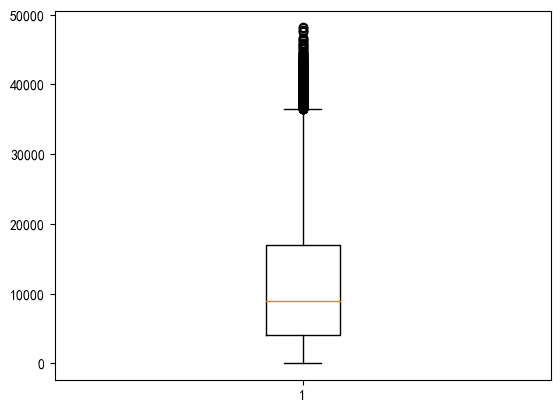

In [26]:
fig = plt.figure()
view = plt.boxplot(use_data['xxfs'])
plt.show()

# 模型训练

In [13]:
employee_id=use_data['id']
use_data=use_data.drop(columns='id')

## 训练集测试集划分

In [14]:
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(use_data,test_size=0.2,random_state=42)
xtrain=train_set.drop(['zjycjx'],axis=1,inplace=False)
ytrain=train_set['zjycjx']
xtest=test_set.drop(['zjycjx'],axis=1,inplace=False)
ytest=test_set['zjycjx']

## 模型训练

In [15]:
from xgboost import plot_importance
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [34]:
params ={'learning_rate': 0.2,
          'max_depth': 5,                # 构建树的深度，越大越容易过拟合

          'objective': 'multi:softprob', # 多分类的问题
          'random_state': 7,

          'num_class':7,                 # 类别数
          'eta':0.8                      #为了防止过拟合，更新过程中用到的收缩步长。eta通过缩减特征 的权重使提升计算过程更加保守。缺省值为0.3，取值范围为：[0,1]
        }
model = xgb.train(params,xgb.DMatrix(xtrain,ytrain))
y_pred=model.predict(xgb.DMatrix(xtest))

yprob = np.argmax(y_pred, axis=1)  # return the index of the biggest pro

predictions = [round(value) for value in yprob]

# evaluate predictions
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 40.37%
